<a href="https://colab.research.google.com/github/koh-hongQ/python/blob/main/%EB%85%BC%ED%94%84_%EA%B3%BC%EC%A0%9C_GAN2%EB%B2%88_smiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/archive (4) (2)/non_smile

/content/drive/MyDrive/archive (4) (2)/non_smile


Text(0.5, 1.0, 'Non_smile')

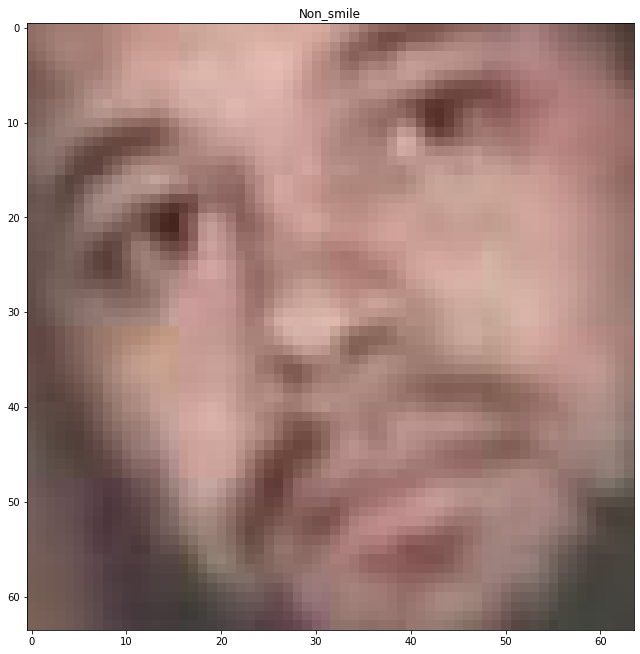

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('Aaron_Patterson_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_smile')

In [ ]:
image_sample.shape

(64, 64, 3)

In [ ]:
pwd

'/content/drive/MyDrive/archive (4) (2)/non_smile'

In [ ]:
cd ..

/content/drive/MyDrive/archive (4) (2)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam


train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )



train = train_gen.flow_from_directory(directory='/content/drive/MyDrive/archive (4) (2)',
                                              target_size=(64,64),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',      # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                             # class_mode='categorical'
                                              batch_size=20)
                                             # shuffle=True)


len(train[0][0])

train[0][0][0] ## 첫번째 배치의 첫번째

Found 603 images belonging to 1 classes.


array([[[0.55173934, 0.35173935, 0.33997464],
        [0.55808   , 0.3605144 , 0.34753248],
        [0.5603219 , 0.36724013, 0.3520163 ],
        ...,
        [0.57682145, 0.38466457, 0.35721356],
        [0.58562046, 0.39346355, 0.36601257],
        [0.60058945, 0.4069289 , 0.37947792]],

       [[0.53828573, 0.33828568, 0.32652098],
        [0.5494952 , 0.34949523, 0.33773053],
        [0.55763113, 0.35916796, 0.34663484],
        ...,
        [0.5772445 , 0.38508764, 0.35763666],
        [0.59640145, 0.40413693, 0.37668595],
        [0.60614145, 0.41063026, 0.38317928]],

       [[0.5223475 , 0.3223475 , 0.30809823],
        [0.53579897, 0.33579895, 0.32379156],
        [0.5472511 , 0.34725112, 0.3354864 ],
        ...,
        [0.58834857, 0.39619166, 0.36874068],
        [0.60195345, 0.40783828, 0.3803873 ],
        [0.6027095 , 0.40663102, 0.37918004]],

       ...,

       [[0.4431373 , 0.26279643, 0.2626425 ],
        [0.4431373 , 0.26604307, 0.25614917],
        [0.4431373 , 0

In [ ]:
train[0][0][0].shape

(64, 64, 3)

In [ ]:
train[0][0].shape

(20, 64, 64, 3)

In [ ]:
train[0][0]

array([[[[0.55893457, 0.41775808, 0.42974478],
         [0.5586409 , 0.4174644 , 0.42886373],
         [0.55834717, 0.4171707 , 0.42798263],
         ...,
         [0.6039216 , 0.38823533, 0.40740857],
         [0.59535617, 0.39716193, 0.41604745],
         [0.5872957 , 0.410662  , 0.4233663 ]],

        [[0.563038  , 0.4218615 , 0.43754777],
         [0.5627443 , 0.42156783, 0.4372541 ],
         [0.5624506 , 0.42127413, 0.4369604 ],
         ...,
         [0.6038384 , 0.3883185 , 0.40792638],
         [0.5948383 , 0.39793864, 0.41630638],
         [0.58703685, 0.41143873, 0.42440194]],

        [[0.5720123 , 0.42840037, 0.45139307],
         [0.5711312 , 0.427813  , 0.4499246 ],
         [0.57025015, 0.42722562, 0.44845617],
         ...,
         [0.6033206 , 0.38883632, 0.40844417],
         [0.59432054, 0.39871538, 0.41656527],
         [0.5867779 , 0.41221547, 0.4254376 ]],

        ...,

        [[0.46274513, 0.28627452, 0.27450982],
         [0.46274513, 0.28627452, 0.27450982]

In [ ]:
type(train[0][0])

numpy.ndarray

In [ ]:
X_train = np.array(train[0][0])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4/4 [==============================] - 0s 9ms/step
6000 [D loss: 0.298198, acc.: 97.27%] [G loss: 1.784815]
4/4 [==============================] - 0s 10ms/step
7000 [D loss: 0.469936, acc.: 76.56%] [G loss: 1.872372]
4/4 [==============================] - 0s 11ms/step
8000 [D loss: 0.454783, acc.: 78.91%] [G loss: 1.793540]
4/4 [==============================] - 0s 10ms/step
9000 [D loss: 0.365667, acc.: 81.25%] [G loss: 1.989804]
4/4 [==============================] - 0s 9ms/step
10000 [D loss: 0.178403, acc.: 94.53%] [G loss: 3.351438]
1/1 [==============================] - 0s 21ms/step


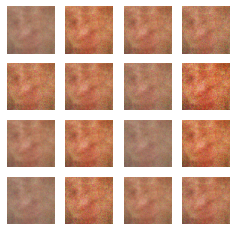

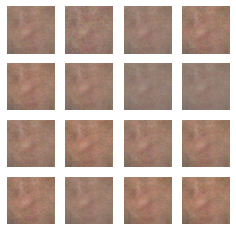

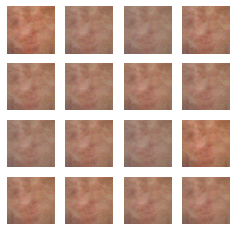

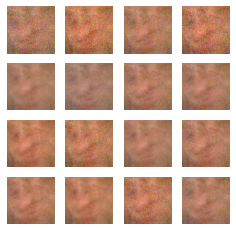

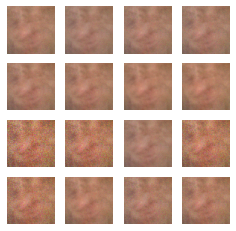

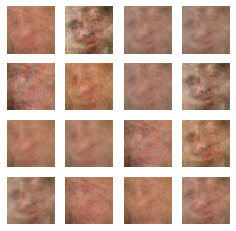

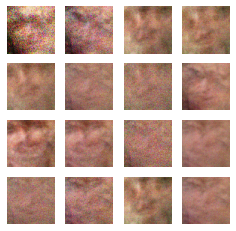

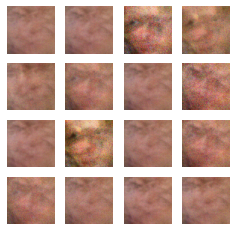

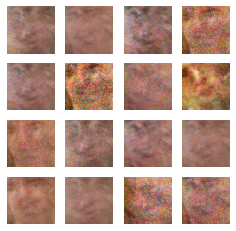

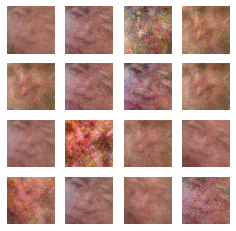

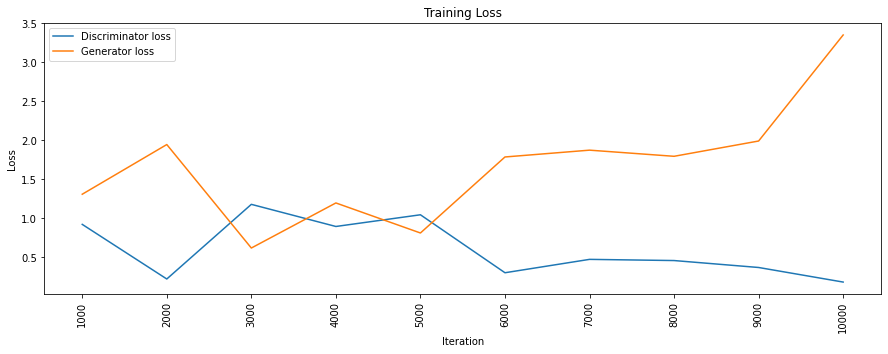

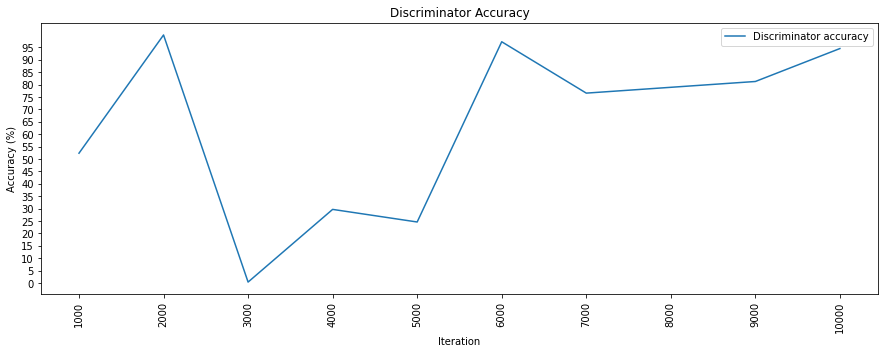

In [ ]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam


img_rows = 64
img_cols = 64
channels = 3
img_shape = (img_rows, img_cols, channels)
z_dim = 100


def build_generator(img_shape, z_dim):
    model = Sequential()
    model.add(Dense(100, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(64 * 64 * 3, activation='sigmoid'))
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(200))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)

    return model


discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(),
                      metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)


gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []




def train(iterations, batch_size, sample_interval, X_train2):
    
    X_train = X_train2 
 ###   X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        discriminator.trainable = False

        z = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            sample_images(generator)



def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)
    ###gen_imgs = 0.5*gen_imgs

    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :] )#, cmap='gray')
            axs[i, j].axis('off')
            cnt += 1


iterations = 10000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval, X_train)

losses = np.array(losses)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()